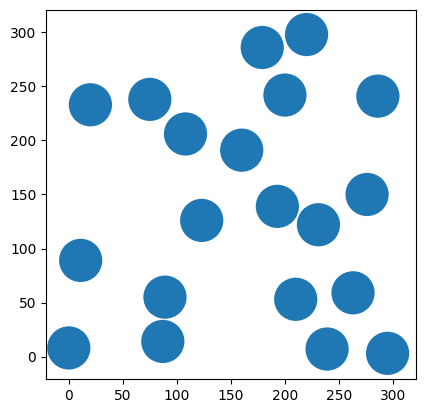

In [1]:
### Taking methods from the classes
import random
from typing import List
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x: int = None, y: int = None, max_range = 300):
        """
        Input x and y; or create a random point.

        If either x or y, or both are not given, a random value will be given.
        """
        # If both x and y are not given
        if x == None and y == None:
          self.x = random.randint(0, max_range)
          self.y = random.randint(0, max_range)

        # If only y is given
        elif x == None:
          self.x = random.randint(0, max_range)
          self.y = y

        # If only x is given
        elif y == None:
          self.x = x
          self.y = random.randint(0, max_range)

        # If both x and y are given
        else:
          self.x = x
          self.y = y

    def __str__(self):
        return "(" + str(int(self.x)) + ", " + str(int(self.y)) + ")"

    def __getitem__(self, indx):
        point = [self.x, self.y]
        return point[indx]

    def midPoint(self, point: "Point"):
        """
        Arguments:

        :return: The middle point of 2 points
        """
        xm = (self.x + point.x) / 2
        ym = (self.y + point.y) / 2
        return Point(xm, ym)

    def distance(self, point: "Point") -> float:
        """
        Arguments:

        :return: Distance between 2 points
        """
        dx = self.x - point.x
        dy = self.y - point.y
        return (dx**2 + dy**2)**(1/2)

class Disk:
    def __init__(self, x: int = None, y: int = None, r = 20, max_range = 300):
        self.center = Point(x, y, max_range = max_range)
        self.r = r

    def __str__(self):
        return str(self.center)

    def intersects(self, other: "Disk") -> bool:
        if Point.distance(self.center, other.center) < self.r + other.r:
            return True
        else:
            return False

def plot_circles(disks: List[Disk], radius: int, max_range: int):
    x_coors = []
    y_coors = []
    circles = []
    for disk in disks:
        circles.append(plt.Circle((disk.center[0], disk.center[1]), radius))

    fig, ax = plt.subplots()

    for circle in circles:
        ax.add_patch(circle)

    ax.set_aspect('equal')
    ax.set_xlim([-21, max_range + 21])
    ax.set_ylim([-21, max_range + 21])
    plt.show()

if __name__ == "__main__":
    disk_num = 20
    disks = []
    radius = 20
    max_range = 300
    num = 0

    while num < disk_num:
        new_disk = Disk(r = radius, max_range = max_range)
        if num == 0:
            disks.append(new_disk)
            num += 1
        else:
            no_intersect = True
            for disk in disks:
                if new_disk.intersects(disk):
                    no_intersect = False
                    break
            if no_intersect:
                disks.append(new_disk)
                num += 1

    plot_circles(disks, radius, max_range)

In [2]:
### BÀI TẬP VỀ NHÀ

# Tạo class di chuyển bằng hình tròn
class MovingCircle(Disk):
    def __init__(self, x = 0, y = 150, r = 10, gap = 5, max_range = 300):
        """
        Tạo ra đường tròn có thể di chuyển.

        Các giá trị khởi tạo đã ổn.
        """
        # Gán giá trị cho self
        self.x = x
        self.y = y
        self.r = r
        self.gap = gap
        self.max_range = max_range

        # Tạo đường tròn đầu tiên
        self.center_points: List[Point] = []
        self.center_points.append(Point(x, y, max_range))
        self.distance = r + gap

        # Khởi tạo các giá trị tính toán
        self.total = 1
        self.fail_num = 0
        self.best = self.x

        # Tạo giá trị x, y "hiện tại"
        self.current_x = self.x
        self.current_y = self.y

    def __getitem__(self, index:int = 0):
        return self.center_points[index]

    def __len__(self):
        return len(self.center_points)

    def __str__(self):
        return str(self.center_points)

    def move(self):
        """
        Di chuyển đường tròn. Sao cho:
        - Cách nhau khoảng cách 5
        - Nằm trong phạm vi
        """
        found = False
        while found == False:
            # Random giá trị x
            if self.current_x + self.distance < self.max_range:
                new_x = random.randint(self.current_x, self.current_x + self.distance)
            else:
                new_x = self.max_range

            # Dựa vào x để tính giá trị y
            new_y = abs(((self.distance)**2 - (self.current_x - new_x)**2)**(1/2) - self.current_y)

            # Kiểm tra điều kiện
            if self.current_x <= new_x <= self.max_range and 0 <= new_y <= self.max_range:
                found = True
                self.total += 1
                self.current_x = new_x
                self.current_y = new_y
                self.center_points.append(Point(new_x, new_y, self.max_range))
            else:
                self.total += 1
                self.fail_num += 1
                if self.fail_num > 100:
                    found = True
                    print("FAil!")

    def is_not_there(self):
        """
        Kiểm tra xem đã đến đích chưa.
        """
        if self.current_x != self.max_range:
            return True
        else:
            return False

def plot_circles(disks, radius = 10, max_range = 300, delay = 0.2):
    # Take coors
    circles = []
    for disk in disks:
        circles.append(plt.Circle((disk[0], disk[1]), radius))

    for circle in circles:
        _, ax = plt.subplots()
        ax.add_patch(circle)
        ax.set_aspect('equal')  # Ensure circles are circular
        ax.set_xlim([-21, max_range + 21])
        ax.set_ylim([-21, max_range + 21])
        from IPython.display import clear_output
        clear_output(wait=True)
        plt.show()
        plt.pause(delay)

def main(x = 0, y = 150, r = 10, gap = 5, max_range = 300, apply_plot = False, apply_print = False, delay = 0.2):
    # Parameters
    trontron = MovingCircle(x = x, y = y, r = r, gap = gap, max_range = max_range)

    # Di chuyển cho đến khi đến nơi
    while trontron.is_not_there():
        trontron.move()

    # Print nếu được cho phép
    if apply_print == True:
        for i in range(len(trontron)):
            if i != 0:
                print(", ", end = "")
            print(trontron[i], end = "")

    # Plot nếu được cho phép
    if apply_plot == True:
        plot_circles(trontron, delay = delay)

    return trontron.total, trontron.fail_num, trontron.current_x

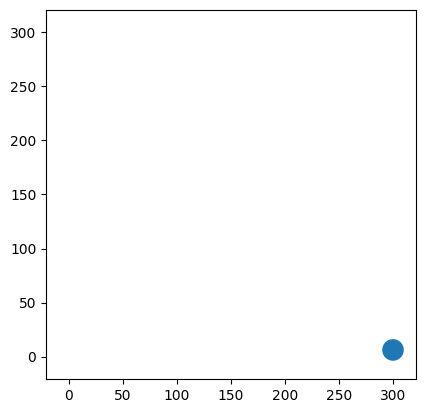

(44, 0, 300)

In [3]:
main(apply_plot = True, delay = 0.3)

In [4]:
### Thêm các giá trị vào list
total_num = []
fail_num = []
for _ in range(200000):
    total, fail, best = main()
    total_num.append(total)
    fail_num.append(fail)

In [5]:
### Print giá trị trung bình của total_num và giá trị max của fail_num
print("Average of total: ", sum(total_num)/len(total_num))
print("Maximum of error: ", max(fail_num))

Average of total:  40.64306
Maximum of error:  0


In [6]:
### Tạo một dictionary để lưu biến ngẫun nhiên
key = list(range(0, 101))
value = []
for _ in range(len(key)):
    value.append(0)

total_random_var = dict(zip(key, value))

In [7]:
### Đưa số liệu vào trong biến ngẫu nhiên
for num in total_num:
    total_random_var[num] += 1

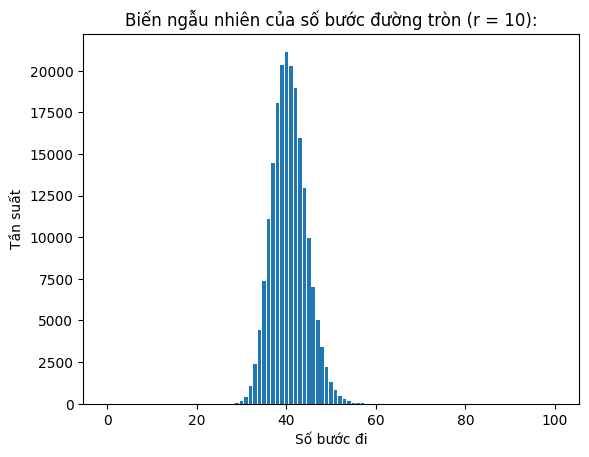

In [8]:
### Plot ra hàm ngẫu nhiên của số lần đường tròn đi: r = 10
import matplotlib.pyplot as plt

plt.bar(total_random_var.keys(), total_random_var.values())
plt.title("Biến ngẫu nhiên của số bước đường tròn (r = 10):")
plt.xlabel("Số bước đi")
plt.ylabel("Tần suất")
plt.show()

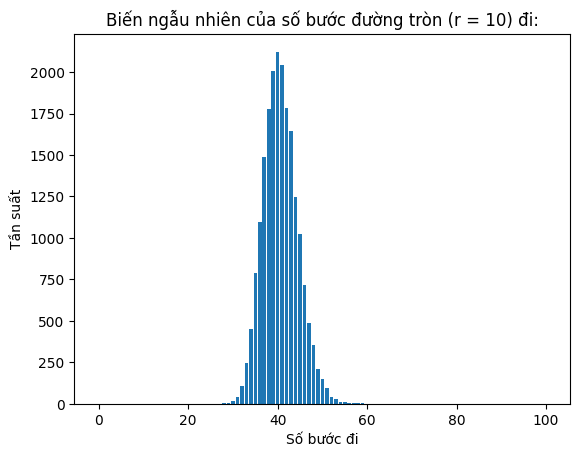

Trung bình số bước:  40.63475
Số lần đi hụt:  0



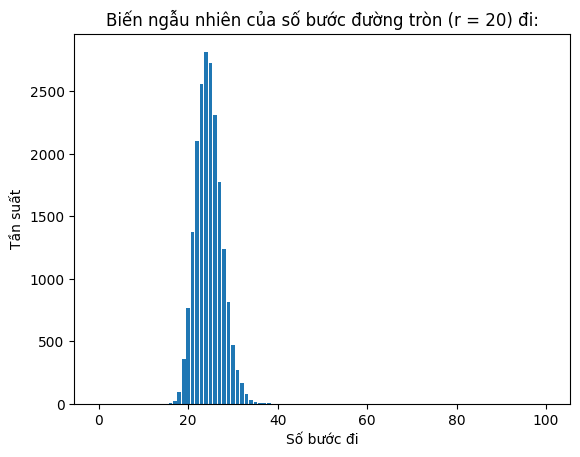

Trung bình số bước:  24.6288
Số lần đi hụt:  0



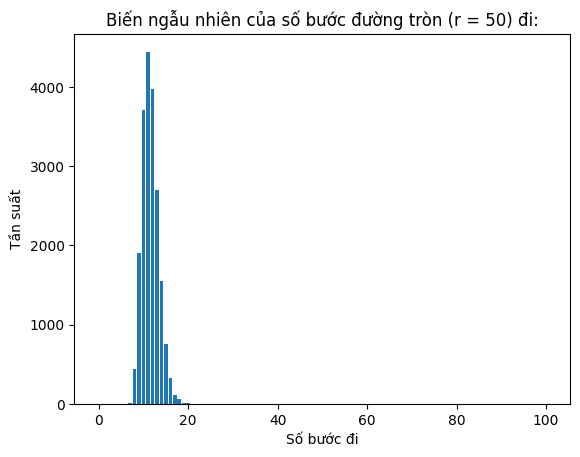

Trung bình số bước:  11.55335
Số lần đi hụt:  0



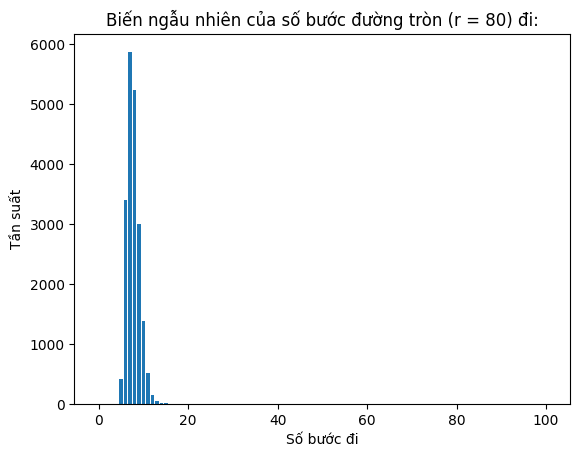

Trung bình số bước:  7.7161
Số lần đi hụt:  0



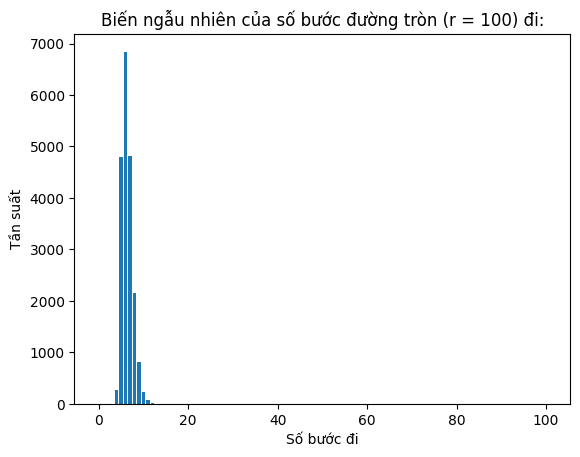

Trung bình số bước:  6.379
Số lần đi hụt:  0



In [9]:
### Test với nhiều số
import matplotlib.pyplot as plt

# Tạo một dictionary để lưu biến ngẫu nhiên
key = list(range(0, 101))
value = []
for _ in range(len(key)):
    value.append(0)
total_random_var = dict(zip(key, value))

# Vòng lặp
for r in [10, 20, 50, 80, 100]:
    # Khởi tạo giá trị tính toán
    var_dict = total_random_var.copy()
    total_num = []
    fail_num = []

    # Lặp
    for _ in range(20000):
        total, fail, best = main(r = r)
        total_num.append(total)
        fail_num.append(fail)

    # Đưa số liệu vào trong biến ngẫu nhiên
    for num in total_num:
        var_dict[num] += 1

    # Plot ra hàm ngẫu nhiên của số lần đường tròn đi
    plt.bar(var_dict.keys(), var_dict.values())
    plt.title(f"Biến ngẫu nhiên của số bước đường tròn (r = {r}) đi:")
    plt.xlabel("Số bước đi")
    plt.ylabel("Tần suất")
    plt.show()

    # Print kết quả
    print("Trung bình số bước: ", sum(total_num)/len(total_num))
    print("Số lần đi hụt: ", max(fail_num))
    print()

In [10]:
steps = []
radiuses = list(range(10, 101, 1))
for r in range(10, 101, 1):
    var_dict = total_random_var.copy()
    total_num = []
    fail_num = []

    for _ in range(5000):
        total, fail, best = main(r = r)
        total_num.append(total)
        fail_num.append(fail)

    steps.append(sum(total_num)/len(total_num))

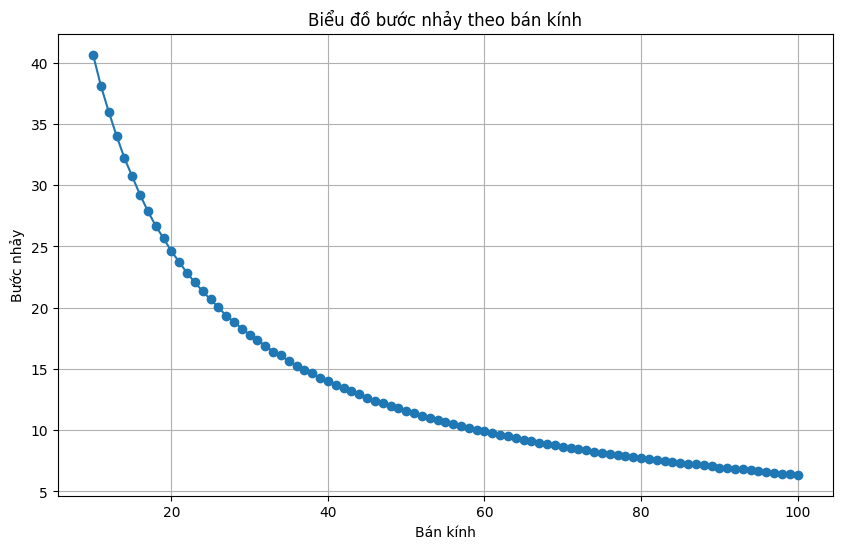

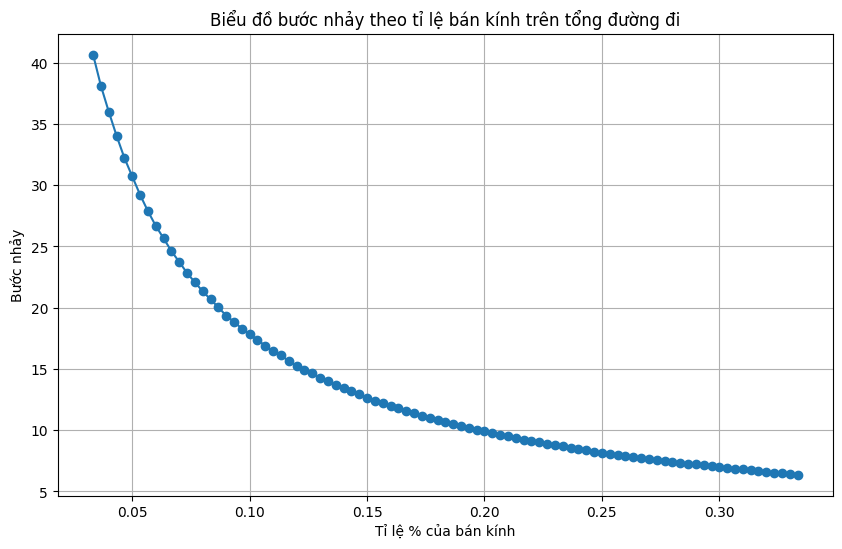

In [11]:
# Biểu đồ bước nhảy theo bán kính
plt.figure(figsize=(10, 6))
plt.plot(radiuses, steps, marker='o')
plt.xlabel('Bán kính')
plt.ylabel('Bước nhảy')
plt.title('Biểu đồ bước nhảy theo bán kính')
plt.grid(True)
plt.show()

total_distance = 300
ratio = [radius / total_distance for radius in radiuses]

# Plot đồ thị
plt.figure(figsize=(10, 6))
plt.plot(ratio, steps, marker='o')
plt.xlabel('Tỉ lệ % của bán kính')
plt.ylabel('Bước nhảy')
plt.title('Biểu đồ bước nhảy theo tỉ lệ bán kính trên tổng đường đi')
plt.grid(True)
plt.show()